In [12]:
import numpy as np
from scipy.optimize import root

# Define the system of equations
def equations(vars, t):
    n=9/5
    I0=10e-9
    q=1.602e-19
    R=5
    i, u_diode = vars
    eq1 = i-I0*(np.exp(q*u_diode/n) - 1)
    eq2 = 2*np.sin(2*np.pi*t)-R*i-u_diode 
    return [eq1, eq2]

# Function to solve the system for a given t
def solve_system(t):
    initial_guess = [1, 0.1]  # Initial guess for x and y
    solution = root(equations, initial_guess, args=(t,))
    if solution.success:
        return solution.x  # Return the values of x and y
    else:
        raise ValueError("Solution did not converge")

# Example usage: solve for different values of t
t_values = np.arange(0, 2, 0.1)  # Example t values

solutions = [solve_system(t) for t in t_values]

for t, sol in zip(t_values, solutions):
    print(f"t = {t:.2f}: x = {sol[0]:.4f}, y = {sol[1]:.4f}")


t_values = np.linspace(-2, 2, 5)  # Example t values from -2 to 2
x_values = x_of_t(t_values)

for t, x in zip(t_values, x_values):
    print(f"t = {t:.2f}: x = {x:.4f}")




C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_28664\33781765.py:13: RuntimeWarning: invalid value encountered in log
  eq3 = u_diode - np.log(i/I0+1)*n/q


ValueError: Solution did not converge

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_28664\2427841534.py:15: RuntimeWarning: invalid value encountered in log
  return 2*np.sin(2*np.pi*t)-R*i-np.log(i/I0+1)*n/a


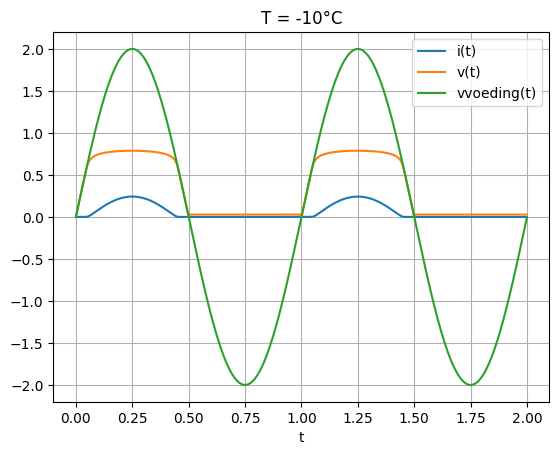

In [53]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

n=9/5
I0=1e-9
q=1.602e-19
k=1.380649e-23
T=273.15-10
a=q/(k*T)
R=5

# Define the nonlinear function f(i, t)
def f(i, t):
    return 2*np.sin(2*np.pi*t)-R*i-np.log(i/I0+1)*n/a 

def solve_for_i(t, initial_guess=0.0001):
    # Define a wrapper function that fixes t
    def equation_to_solve(i):
        return f(i, t)
    
    # Use fsolve to solve the equation
    solution = fsolve(equation_to_solve, 0.000000001)
    return solution[0]

def calculate_v_diode_from_i(i):
    return np.log(i/I0+1)*n/a

def i_of_t(t_values):
    return [solve_for_i(t) for t in t_values]

def v_bron_of_t(t_values):
    return [2*np.sin(2*np.pi*t) for t in t_values]

def v_of_i(i_values):
    return [calculate_v_diode_from_i(i) for i in i_values]


t_values = np.arange(0, 2, 0.001)  # Example t values
i_values = i_of_t(t_values)
v_values = v_of_i(i_values)
v_bron_values = v_bron_of_t(t_values)

# Plot the function i(t)
plt.plot(t_values, i_values, label="i(t)")
plt.plot(t_values, v_values, label="v(t)")
plt.plot(t_values, v_bron_values, label="vvoeding(t)")
plt.xlabel("t")
plt.legend()
plt.title("T = -10°C")
plt.grid(True)
plt.show()


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_28664\1699332168.py:15: RuntimeWarning: invalid value encountered in log
  return 2*np.sin(2*np.pi*t)-R*i-np.log(i/I0+1)*n/a


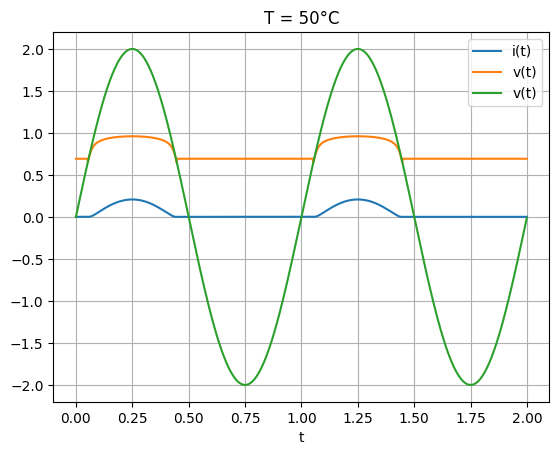

In [49]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

n=9/5
I0=1e-9
q=1.602e-19
k=1.380649e-23
T=273.15+50
a=q/(k*T)
R=5

# Define the nonlinear function f(i, t)
def f(i, t):
    return 2*np.sin(2*np.pi*t)-R*i-np.log(i/I0+1)*n/a 

def solve_for_i(t, initial_guess=0.0001):
    # Define a wrapper function that fixes t
    def equation_to_solve(i):
        return f(i, t)
    
    # Use root_scalar to solve the equation
    solution = fsolve(equation_to_solve, 0.001)
    return solution[0]

def calculate_v_diode_from_i(i):
    return np.log(i/I0+1)*n/a

def i_of_t(t_values):
    return [solve_for_i(t) for t in t_values]


def v_bron_of_t(t_values):
    return [2*np.sin(2*np.pi*t) for t in t_values]


def v_of_i(i_values):
    return [calculate_v_diode_from_i(i) for i in i_values]


t_values = np.arange(0, 2, 0.001)  # Example t values
i_values = i_of_t(t_values)
v_values = v_of_i(i_values)
v_bron_values = v_bron_of_t(t_values)

# Plot the function i(t)
plt.plot(t_values, i_values, label="i(t)")
plt.plot(t_values, v_values, label="v(t)")
plt.plot(t_values, v_bron_values, label="v(t)")
plt.xlabel("t")
plt.legend()
plt.title("T = 50°C")
plt.grid(True)
plt.show()

2.302585092994046
